# Multilingual CyberBullying Detection based on PyTorch
## Manish Kumar  - RAxxxx

##### Installing base Packages

In [ ]:
!pip install transformers datasets torch pandas torchsummary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


##### Importing Libraries, and Initialisation

In [ ]:
import torch
from transformers import AutoTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import numpy as np
from datasets import load_dataset

##### Declearing Model Name and Initialisation of Model

In [ ]:
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##### Loading Mutlilingual Datasets, and Spliting under Train datasets

In [ ]:
hindi_data = load_dataset('indic_glue', 'iitp-pr.hi', split='train')
marathi_data = load_dataset('indic_glue', 'inltkh.mr', split='train')
malayalam_data = load_dataset('indic_glue', 'inltkh.ml', split='train')

README.md:   0%|          | 0.00/49.5k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/404k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/52.9k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4182 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/523 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/523 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/670k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/84.9k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/85.1k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9672 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1210 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1210 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/454k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/59.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/57.3k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5036 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/630 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/630 [00:00<?, ? examples/s]

In [ ]:
data_frames = []

for data in [hindi_data, marathi_data, malayalam_data]:
    df = pd.DataFrame({
        'text': data['text'],
        'label': data['label']  # Ensure labels are in [0, 1, 2] representing [negative, neutral, positive]
    })
    data_frames.append(df)

df_combined = pd.concat(data_frames).reset_index(drop=True)

In [ ]:
sentences = df_combined['text'].tolist()
labels = df_combined['label'].tolist()

train_texts, val_texts, train_labels, val_labels = train_test_split(sentences, labels, test_size=0.2)

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

In [ ]:
class CyberbullyingDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CyberbullyingDataset(train_encodings, train_labels)
val_dataset = CyberbullyingDataset(val_encodings, val_labels)

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='weighted')
    return {'accuracy': acc, 'f1': f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Check unique labels in the combined dataset
unique_labels = df_combined['label'].unique()
print("Unique labels:", unique_labels)


Unique labels: [0 1 2 3 4]


In [ ]:
# Print the first few rows to see the 'label' column
print(df_combined[['text', 'label']].head(10))

# Check for rows where the label is NaN
nan_labels = df_combined[df_combined['label'].isna()]
print("Rows with NaN labels:", nan_labels)


                                                text  label
0           एंडराॅयड के मामले में यह थोड़ा पीछे है ।      0
1  यह एस्पेक्ट रेशो का ईश्यू है और हम आशा करते है...      1
2  लेकिन इस तरह के एक मॉडल के एक घर कंप्यूटर के ल...      2
3  गिर वन राष्ट्रीय उद्यान बाघ संरक्षित क्षेत्र ह...      2
4  और हां , इस फिल्म में हर किरदार भारद्वाज को भर...      1
5  फोन उपयोग में बेहद ही आसान है और टच रिस्पॉरन्स...      2
6  डिजिफलीप प्रो टेबलेट् अपने वर्ग में सर्वोत्तम ...      2
7  युवाओं के लिए यह फोन कमजोर रैम के कारण बहुत ज्...      0
8  पेरिस्कोप के एंड्रॉयड वर्जन में कुछ ऎसे यूनिक ...      1
9  वनों की विलक्षण वनस्पति तथा हरे घास के मैदानों...      1
Rows with NaN labels: Empty DataFrame
Columns: [text, label]
Index: []


In [ ]:
# Define the correct mapping based on your dataset's values
label_mapping = {
    'neg': 0,
    'neu': 1,
    'pos': 2,
    # Add any additional mappings if needed
}

# Apply the mapping to convert labels
df_combined['label'] = df_combined['label'].map(label_mapping)


In [ ]:
# Drop rows where label is NaN
df_combined = df_combined.dropna(subset=['label'])

In [ ]:
# Confirm unique labels are as expected
unique_labels = df_combined['label'].unique()
print("Unique labels after cleaning:", unique_labels)

Unique labels after cleaning: []


In [ ]:
# Check the structure of each original dataset to ensure they contain 'text' and 'label' columns
print("Hindi data columns:", hindi_data.column_names)
print("Marathi data columns:", marathi_data.column_names)
print("Malayalam data columns:", malayalam_data.column_names)

# Display some samples from each dataset
print("Hindi data sample:", hindi_data[:5])
print("Marathi data sample:", marathi_data[:5])
print("Malayalam data sample:", malayalam_data[:5])

Hindi data columns: ['text', 'label']
Marathi data columns: ['text', 'label']
Malayalam data columns: ['text', 'label']
Hindi data sample: {'text': ['एंडराॅयड के मामले में यह थोड़ा पीछे है ।', 'यह एस्पेक्ट रेशो का ईश्यू है और हम आशा करते हैं कि यह आने वाले अपडेट में फिक्स कर दिया जाएगा ।', 'लेकिन इस तरह के एक मॉडल के एक घर कंप्यूटर के लिए एक शानदार विकल्प हो सकता है ।', 'गिर वन राष्ट्रीय उद्यान बाघ संरक्षित क्षेत्र है जो एशियाई बब्बर शेर के लिए विश्व प्रसिद्ध है ।', 'और हां , इस फिल्म में हर किरदार भारद्वाज को भरद्वाज क्यों बुलाता है ?'], 'label': [0, 1, 2, 2, 1]}
Marathi data sample: {'text': ['…म्हणून सानिया मिर्झाची ड्यू डेट आहे खास', 'Video : दीपिका-रणवीरच्या लग्नाचा मेन्यू झाला लीक!', 'सचिनच्या रणजी कारकीर्दीचा शेवट गोड, मुंबईचा विजय', 'पुरंदरेंना महाराष्ट्र भूषण पुरस्काराविरोधात संभाजी ब्रिगेड रस्त्यावर', 'जयपूर पोलिसांच्या जाहिरातीवर बुमराह संतापला, सुनावले खडेबोल'], 'label': [0, 0, 3, 4, 3]}
Malayalam data sample: {'text': ['ജോലിയില്\u200d നിന്ന് ഒരു ബ്രേക്ക് എടുക്കുന്നതിനു മുന

In [ ]:
# Filter and map Hindi labels (no filtering needed as all labels are within range)
hindi_texts = hindi_data['text']
hindi_labels = hindi_data['label']

# Filter Marathi dataset to include only 0, 1, 2 labels
marathi_texts = [text for text, label in zip(marathi_data['text'], marathi_data['label']) if label in [0, 1, 2]]
marathi_labels = [label for label in marathi_data['label'] if label in [0, 1, 2]]

# Filter Malayalam dataset to include only 0, 1, 2 labels
malayalam_texts = [text for text, label in zip(malayalam_data['text'], malayalam_data['label']) if label in [0, 1, 2]]
malayalam_labels = [label for label in malayalam_data['label'] if label in [0, 1, 2]]

# Check the count of each dataset
print("Hindi text-label count:", len(hindi_texts), len(hindi_labels))
print("Marathi text-label count (filtered):", len(marathi_texts), len(marathi_labels))
print("Malayalam text-label count (filtered):", len(malayalam_texts), len(malayalam_labels))

# Combine into a DataFrame
texts = hindi_texts + marathi_texts + malayalam_texts
labels = hindi_labels + marathi_labels + malayalam_labels
df_combined = pd.DataFrame({'text': texts, 'label': labels})

# Verify the combined dataset
print("Combined dataset sample:", df_combined.head())
print("Unique labels in combined dataset:", df_combined['label'].unique())

Hindi text-label count: 4182 4182
Marathi text-label count (filtered): 2660 2660
Malayalam text-label count (filtered): 3310 3310
Combined dataset sample:                                                 text  label
0           एंडराॅयड के मामले में यह थोड़ा पीछे है ।      0
1  यह एस्पेक्ट रेशो का ईश्यू है और हम आशा करते है...      1
2  लेकिन इस तरह के एक मॉडल के एक घर कंप्यूटर के ल...      2
3  गिर वन राष्ट्रीय उद्यान बाघ संरक्षित क्षेत्र ह...      2
4  और हां , इस फिल्म में हर किरदार भारद्वाज को भर...      1
Unique labels in combined dataset: [0 1 2]


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
encodings = tokenizer(df_combined['text'].tolist(), truncation=True, padding=True, max_length=128)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
import torch

class CyberbullyingDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

dataset = CyberbullyingDataset(encodings, df_combined['label'].tolist())

In [ ]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(df_combined['text'].tolist(), df_combined['label'].tolist(), test_size=0.2)
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

train_dataset = CyberbullyingDataset(train_encodings, train_labels)
val_dataset = CyberbullyingDataset(val_encodings, val_labels)


##### Initialisation of Model

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##### Model Summary Information

In [ ]:
import torch
from transformers import AutoModel
from torchsummary import summary

# Load the BERT model
model = AutoModel.from_pretrained("bert-base-multilingual-cased")

# Move the model to the correct device if using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define an example input size for BERT (batch size, sequence length)
example_batch_size = 1  # We use 1 for simplicity
example_sequence_length = 128  # Adjust based on typical input length

# Create a sample input tensor with the correct size (batch_size, sequence_length)
sample_input = torch.randint(0, 1000, (example_batch_size, example_sequence_length)).to(device)

# Run the model on the sample input to get the output shape
output = model(sample_input)

# Print model summary
print(model)


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

##### Defining Method Compute_Metrics

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# Load the BERT model for sequence classification
model_name = "bert-base-multilingual-cased"
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)  # 3 labels for sentiment

# Move the model to the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the TrainingArguments and Trainer as before
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    eval_strategy="epoch"
)

# Assuming train_dataset and val_dataset are already defined
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics  # Your custom metrics function
)

# Train the model
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.575800,0.417573,0.837026,0.842253
2,0.372600,0.376067,0.856721,0.859282
3,0.236600,0.359928,0.874938,0.875707


TrainOutput(global_step=1524, training_loss=0.39165918220059454, metrics={'train_runtime': 692.4564, 'train_samples_per_second': 35.183, 'train_steps_per_second': 2.201, 'total_flos': 1602558049026816.0, 'train_loss': 0.39165918220059454, 'epoch': 3.0})

In [ ]:
eval_results = trainer.evaluate()
print(f"Accuracy: {eval_results['eval_accuracy']}")
print(f"F1 Score: {eval_results['eval_f1']}")


Accuracy: 0.8749384539635647
F1 Score: 0.8757070131507797


##### Testing Inferences with one Sample Text

In [ ]:
def predict_text(text):
    # Move model to the appropriate device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Prepare inputs and move them to the same device
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # Perform inference
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = logits.argmax().item()

    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_map[predicted_class]

# Test with a sample input
sample_text = " സാമ്പത്തികത്തട്ടിപ്പിനിരയായാൽ ഒരുമണിക്കൂറിനകം തന്നെ വിവരം 1930 എന്ന നമ്പറിൽ സൈബർ പോലീസിനെ അറിയിക്കുക "
print("Sentiment:", predict_text(sample_text))


Sentiment: Neutral


In [ ]:
# Generate predictions on the validation set
predictions = trainer.predict(val_dataset)

# Extract labels and predictions
val_labels = np.array(predictions.label_ids)
val_preds = np.argmax(predictions.predictions, axis=1)


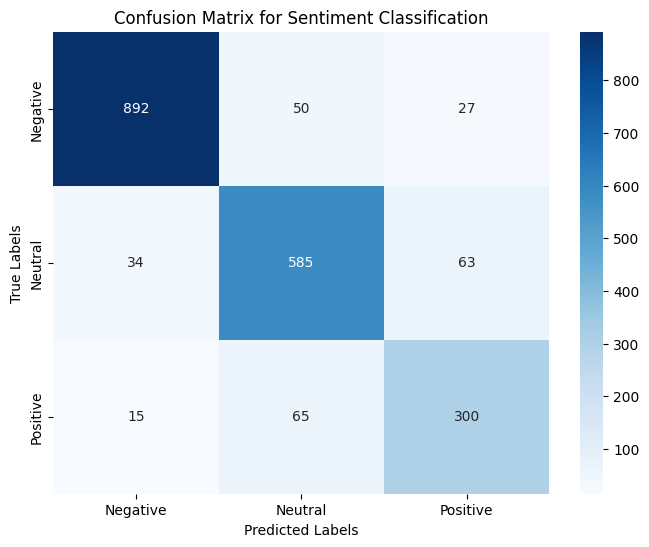

Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.92      0.93       969
     Neutral       0.84      0.86      0.85       682
    Positive       0.77      0.79      0.78       380

    accuracy                           0.87      2031
   macro avg       0.85      0.86      0.85      2031
weighted avg       0.88      0.87      0.88      2031



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Sentiment Classification")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(val_labels, val_preds, target_names=["Negative", "Neutral", "Positive"]))


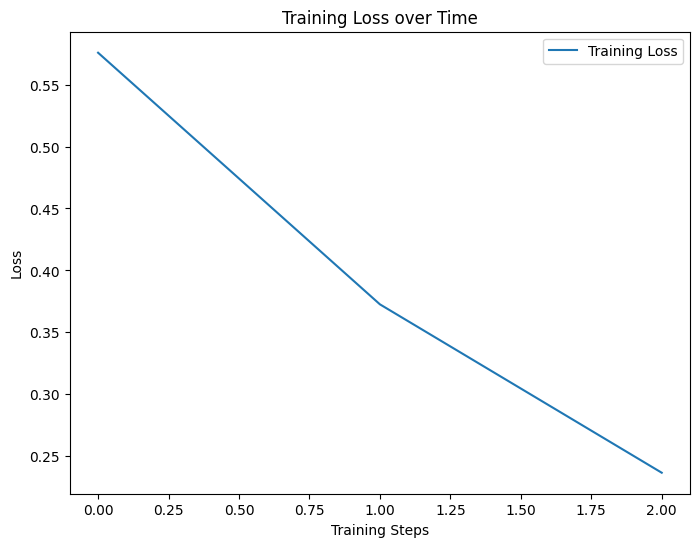

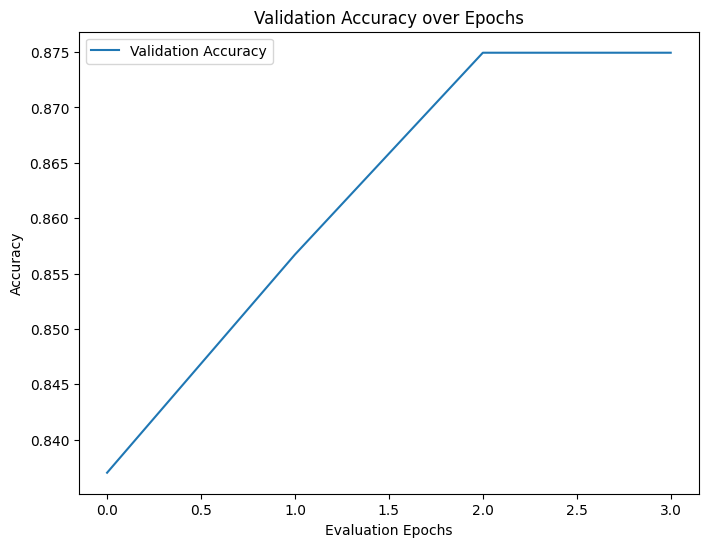

In [ ]:
# Extract training history data from Trainer
train_loss = trainer.state.log_history
train_loss = [log['loss'] for log in train_loss if 'loss' in log]

# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label="Training Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training Loss over Time")
plt.legend()
plt.show()

# Accuracy over evaluation epochs (if recorded)
eval_accuracy = [log['eval_accuracy'] for log in trainer.state.log_history if 'eval_accuracy' in log]
plt.figure(figsize=(8, 6))
plt.plot(eval_accuracy, label="Validation Accuracy")
plt.xlabel("Evaluation Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy over Epochs")
plt.legend()
plt.show()


In [ ]:
import torch
from transformers import AutoTokenizer
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import accuracy_score, f1_score

# Move model and tokenizer setup here if not already done
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

# Validation set accuracy and F1 score (calculated after evaluation)
def evaluate_model():
    predictions = trainer.predict(val_dataset)
    val_labels = predictions.label_ids
    val_preds = np.argmax(predictions.predictions, axis=1)
    accuracy = accuracy_score(val_labels, val_preds)
    f1 = f1_score(val_labels, val_preds, average='weighted')
    return accuracy, f1

accuracy, f1 = evaluate_model()

# Define the prediction function
def predict_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = logits.argmax().item()
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_map[predicted_class]

# Create input box and display results
def on_submit(change):
    user_input = change['new']
    sentiment = predict_text(user_input)
    print(f"\nInput Tweet: {user_input}")
    print(f"Predicted Sentiment: {sentiment}")
    print(f"Model Accuracy: {accuracy:.2f}")
    print(f"Model F1 Score: {f1:.2f}")

# Create a text box widget
input_box = widgets.Text(
    value='',
    placeholder='Type a tweet or sentence here',
    description='Input:',
    disabled=False
)

# Display the input box and set up event listener
display(input_box)
input_box.observe(on_submit, names='value')


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Text(value='', description='Input:', placeholder='Type a tweet or sentence here')


Input Tweet: സാമ്പത്തികത്തട്ടിപ്പിനിരയായാൽ ഒരുമണിക്കൂറിനകം തന്നെ വിവരം 1930 എന്ന നമ്പറിൽ സൈബർ പോലീസിനെ അറിയിക്കുക
Predicted Sentiment: Neutral
Model Accuracy: 0.87
Model F1 Score: 0.88

Input Tweet: या हॅलोविनमध्ये कोणत्याही गंभीर चुका करण्यापासून सावध रहा आणि फसवणूक झाल्याच्या पहिल्या लक्षणांवर त्यांना भूत करा.
Predicted Sentiment: Negative
Model Accuracy: 0.87
Model F1 Score: 0.88

Input Tweet: बिहार पुलिसवाणी में आज देखें, साइबर अपराध से जुड़ी शिकायतों को किस हेल्पलाइन नंबर के माध्यम से आप रिपोर्ट कर सकते हैं
Predicted Sentiment: Neutral
Model Accuracy: 0.87
Model F1 Score: 0.88

Input Tweet: Hahahahahahahaha How The Fuck Is Cyber Bullying Real Hahahaha Nigga Just Walk Away From The Screen Like Nigga Close Your Eyes Haha
Predicted Sentiment: Negative
Model Accuracy: 0.87
Model F1 Score: 0.88


##### Saving Model in Disk

In [ ]:
torch.save(model,"CyberBulling_model.pth")

##### Loading model and further inferences checking

In [ ]:
model = torch.load("CyberBulling_model.pth")
model.eval()

<ipython-input-35-3706b21dbf15>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("CyberBulling_model.pth")


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1